In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import math

In [3]:
import seaborn as sns

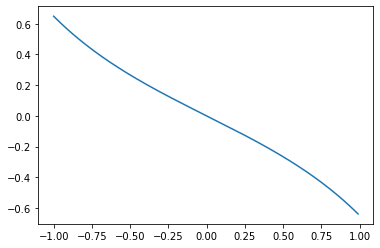

In [4]:
x = np.arange(-1,1,0.01)

def f(x):
    return (1-math.e**(0.5*x*x))/x

y = [f(x) for x in x]
sns.lineplot(x,y)

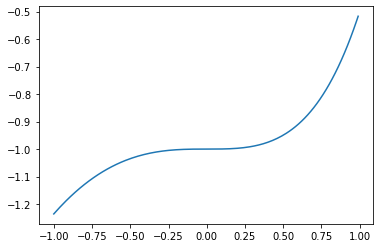

In [5]:
x = np.arange(-1,1,0.01)
a = -1
def f(x):
    return (0.5*x*x + (x*math.e**(-a*x))/a + (math.e**(-a*x))/(a*a))/a

y = [f(x) for x in x]
sns.lineplot(x,y)

In [77]:
#exponential utility function. C is input values, a>0 concave, a<0 convex 
def u(c, a):
    if a == 0:
        return c
    else:
        return (1-math.e**(-a*c))/a

In [7]:
def us(c_list,a): #utility function for the list of values
    if a == 0:
        return c_list
    else:        
        return [u(c, a) for c in c_list]
            

In [8]:
u_list = np.random.normal(0,1,1000)

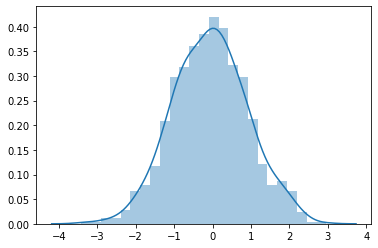

In [9]:
sns.distplot(u_list)

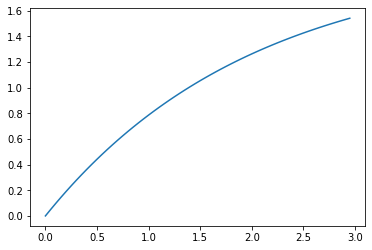

In [10]:
x = np.arange(0,3,0.05)
y = [u(c,0.5) for c in x]
sns.lineplot(x,y) #concave utility fucntion 

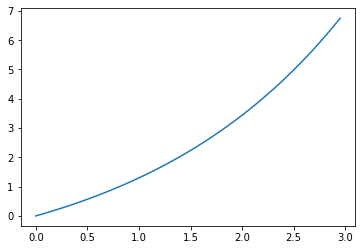

In [11]:
x = np.arange(0,3,0.05)
y = [u(c,-0.5) for c in x]
sns.lineplot(x,y) #convex utility function 

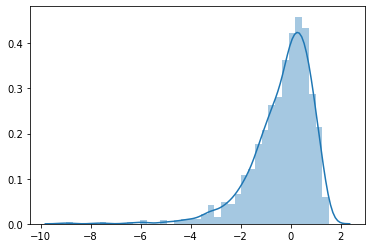

In [12]:
sns.distplot([u(c, 0.5) for c in u_list]) #utilites of concave utility function 

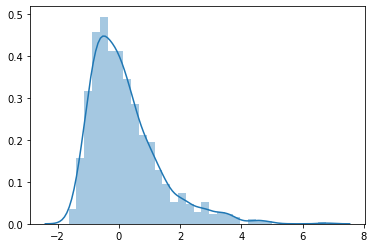

In [13]:
sns.distplot([u(c, -0.5) for c in u_list]) #utilites of concave utility function 

## Selection Bias - single attribute 

In [14]:
max_df = {}
for n in range(1, 16):
    max_list = []
    for i in range(1000):
        u_list = us(np.random.normal(0,1,n), 0)  #concave transformation
        max_list.append(max(u_list))
    max_df[n] = max_list


In [15]:
pd.DataFrame(max_df).mean(axis=0)

1     0.019809
2     0.549050
3     0.845124
4     1.039363
5     1.134500
6     1.256526
7     1.339723
8     1.413565
9     1.505769
10    1.539435
11    1.567588
12    1.625092
13    1.629706
14    1.700106
15    1.723543
dtype: float64

In [16]:
part = pd.DataFrame(max_df)[[1,2,5,10]]

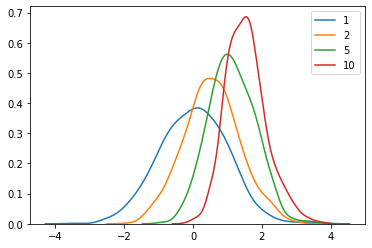

In [17]:
sns.kdeplot(part[1])
sns.kdeplot(part[2])
sns.kdeplot(part[5])
sns.kdeplot(part[10])

In [18]:
def mean_bias(a=0):
    max_df = {}
    for n in range(1, 16):
        max_list = []
        for i in range(1000):
            u_list = us(np.random.normal(0,1,n), a)  #concave transformation
            max_list.append(max(u_list))
        max_df[n] = max_list
    
    df = pd.DataFrame(max_df)
    print(df.mean(axis=0))
    
    sns.kdeplot(df[1])
    sns.kdeplot(df[2])
    sns.kdeplot(df[5])
    sns.kdeplot(df[10])

1    -0.010824
2     0.548801
3     0.861522
4     1.052038
5     1.152201
6     1.255345
7     1.323883
8     1.384586
9     1.526897
10    1.533452
11    1.587454
12    1.655799
13    1.658629
14    1.695356
15    1.756741
dtype: float64


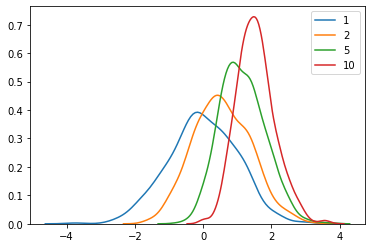

In [19]:
mean_bias()

1    -0.291138
2     0.353477
3     0.598234
4     0.729668
5     0.804487
6     0.889869
7     0.932721
8     0.982254
9     0.993897
10    1.050924
11    1.043463
12    1.070990
13    1.100199
14    1.124844
15    1.130026
dtype: float64


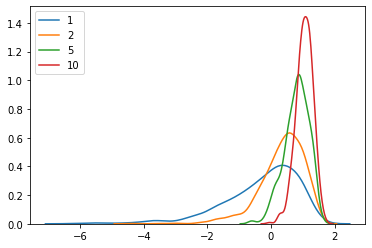

In [83]:
mean_bias(a=0.5) #case of concave

1     0.288505
2     0.910534
3     1.237838
4     1.578336
5     1.753909
6     2.091810
7     2.089370
8     2.231757
9     2.408467
10    2.469374
11    2.625054
12    2.772780
13    2.788821
14    2.891452
15    2.922288
dtype: float64


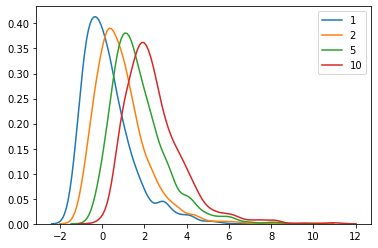

In [21]:
mean_bias(a=-0.5) #case of convex

## Selection Bias - multi attribute 

In [79]:
def bias(n_attributes, weights, variances, n_alternatives, a=0):
    
    
    def u_sum(u_list):
        return sum([x*y for x, y in zip(u_list, weights)])
    
    max_list = []
    
    for i in range(1000): #make 1000 examples
        mu_list = [] #placeholder for mu alternatives 
        for n in range(n_alternatives):
            u_list = [] #place holder for utilities
            for m in range(n_attributes):
                u_list.append(u(np.random.normal(0, variances[m]), a)) 
            mu_list.append(u_list)
        max_list.append(max(mu_list, key=u_sum))
        
    return max_list

0    0.086778
1    0.839866
2    0.112054
dtype: float64


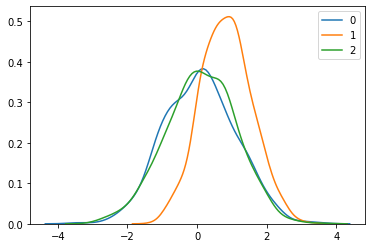

In [80]:
df = pd.DataFrame(bias(3, [0.1, 0.9, 0.1], [1,1,1], 3, a=0))
print(np.mean(df))
sns.kdeplot(df[0])
sns.kdeplot(df[1])
sns.kdeplot(df[2])

0    0.088641
1    0.215507
2    0.786755
dtype: float64


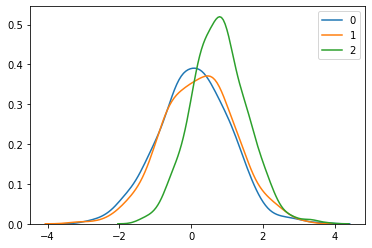

In [118]:
df = pd.DataFrame(bias(3, [0.1, 0.2, 0.7], [1,1,1], 3, a=0))
print(np.mean(df))
sns.kdeplot(df[0])
sns.kdeplot(df[1])
sns.kdeplot(df[2])

0    0.329504
1    1.321557
2    0.401898
dtype: float64


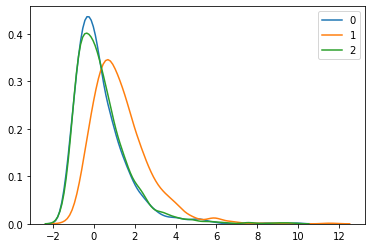

In [82]:
df = pd.DataFrame(bias(3, [0.1, 0.9, 0.1], [1,1,1], 3, a=-0.5)) #convex
print(np.mean(df))
sns.kdeplot(df[0])
sns.kdeplot(df[1])
sns.kdeplot(df[2])

0    0.485511
1    0.505298
2    0.456496
dtype: float64


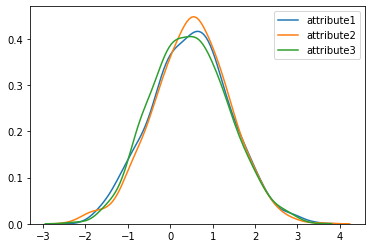

In [115]:
df = pd.DataFrame(bias(3, [1/3, 1/3, 1/3], [1,1,1], 3, a=0))
print(np.mean(df))
sns.kdeplot(df[0])
sns.kdeplot(df[1])
sns.kdeplot(df[2])
plt.legend(labels = ["attribute1", "attribute2", "attribute3"])

0    0.074422
1    0.364775
2    1.508669
dtype: float64


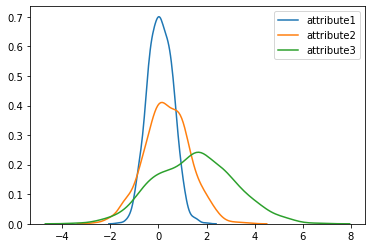

In [114]:
df = pd.DataFrame(bias(3, [1/3, 1/3, 1/3], [0.5,1,2], 3, a=0))
print(np.mean(df))
sns.kdeplot(df[0])
sns.kdeplot(df[1])
sns.kdeplot(df[2])
plt.legend(labels = ["attribute1", "attribute2", "attribute3"])

0    0.484947
1    0.465872
2    0.512183
dtype: float64


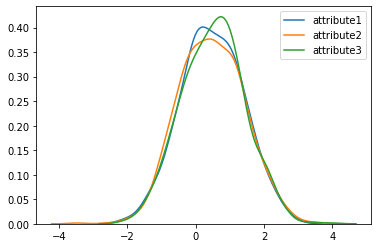

In [105]:
df = pd.DataFrame(bias(3, [1/3, 1/3, 1/3], [1,1,1], 3, a=0))
print(np.mean(df))
sns.kdeplot(df[0])
sns.kdeplot(df[1])
sns.kdeplot(df[2])
plt.legend(labels = ["attribute1", "attribute2", "attribute3"])

0    0.329574
1    0.406254
2    0.332740
3    0.396009
4    0.379925
dtype: float64


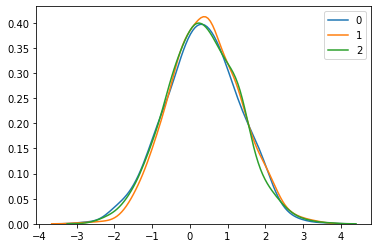

In [63]:
df = pd.DataFrame(bias(5, [1/5,1/5, 1/5, 1/5, 1/5], [1,1,1,1,1], 3, a=0))
print(np.mean(df))
sns.kdeplot(df[0])
sns.kdeplot(df[1])
sns.kdeplot(df[2])

In [85]:
result_d = {}
for n in range(1, 15):
    df = pd.DataFrame(bias(3, [1/3, 1/3, 1/3], [1,1,1], n, a=0))
    result_d[n] = np.mean(df)

0   -0.023822
1   -0.041355
2    0.058689
dtype: float64
0    0.326778
1    0.327618
2    0.287186
dtype: float64
0    0.446012
1    0.491969
2    0.453299
dtype: float64
0    0.606818
1    0.624621
2    0.541296
dtype: float64
0    0.696895
1    0.636706
2    0.701062
dtype: float64
0    0.692787
1    0.739917
2    0.795878
dtype: float64
0    0.787243
1    0.816268
2    0.786426
dtype: float64
0    0.780158
1    0.882039
2    0.804743
dtype: float64
0    0.820132
1    0.871675
2    0.854210
dtype: float64
0    0.844275
1    0.818247
2    0.948126
dtype: float64
0    0.905574
1    0.890690
2    0.972667
dtype: float64
0    0.928444
1    0.979388
2    0.925565
dtype: float64
0    0.978805
1    0.998651
2    0.920034
dtype: float64
0    0.990645
1    0.982234
2    0.997136
dtype: float64


In [99]:
pd.DataFrame(result_d).T[0]*(1/3) + pd.DataFrame(result_d).T[1]*(1/3) + pd.DataFrame(result_d).T[2]*(1/3)

1    -0.002163
2     0.313861
3     0.463760
4     0.590912
5     0.678221
6     0.742861
7     0.796646
8     0.822313
9     0.848672
10    0.870216
11    0.922977
12    0.944466
13    0.965830
14    0.990005
dtype: float64

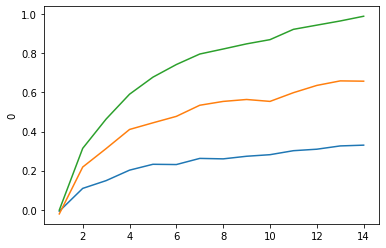

In [100]:
sns.lineplot(list(result_d.keys()),pd.DataFrame(result_d).T[0]*(1/3))
sns.lineplot(list(result_d.keys()),pd.DataFrame(result_d).T[0]*(1/3) + pd.DataFrame(result_d).T[1]*(1/3))
sns.lineplot(list(result_d.keys()),pd.DataFrame(result_d).T[0]*(1/3) + pd.DataFrame(result_d).T[1]*(1/3) + pd.DataFrame(result_d).T[2]*(1/3))

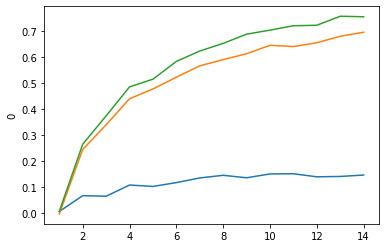

In [103]:
result_d = {}
for n in range(1, 15):
    df = pd.DataFrame(bias(3, [0.2, 0.7, 0.1], [1,1,1], n, a=0))
    result_d[n] = np.mean(df)
    
sns.lineplot(list(result_d.keys()),pd.DataFrame(result_d).T[0]*(1/3))
sns.lineplot(list(result_d.keys()),pd.DataFrame(result_d).T[0]*(1/3) + pd.DataFrame(result_d).T[1]*(1/3))
sns.lineplot(list(result_d.keys()),pd.DataFrame(result_d).T[0]*(1/3) + pd.DataFrame(result_d).T[1]*(1/3) + pd.DataFrame(result_d).T[2]*(1/3))

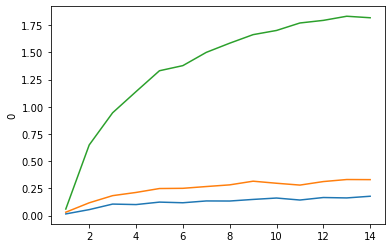

In [104]:
result_d = {}
for n in range(1, 15):
    df = pd.DataFrame(bias(3, [1/3, 1/3, 1/3], [1,1,3], n, a=0))
    result_d[n] = np.mean(df)
    
sns.lineplot(list(result_d.keys()),pd.DataFrame(result_d).T[0]*(1/3))
sns.lineplot(list(result_d.keys()),pd.DataFrame(result_d).T[0]*(1/3) + pd.DataFrame(result_d).T[1]*(1/3))
sns.lineplot(list(result_d.keys()),pd.DataFrame(result_d).T[0]*(1/3) + pd.DataFrame(result_d).T[1]*(1/3) + pd.DataFrame(result_d).T[2]*(1/3))